<a href="https://colab.research.google.com/github/lequanngo/Bitcoin/blob/master/April_2020_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#Description: This program predicts the price of Bitcoin for the next 30 days

#Data Source: https://www.blockchain.com/charts/market-price?
# https://towardsdatascience.com/bitcoin-price-prediction-using-lstm-9eb0938c22bd

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv('https://raw.githubusercontent.com/lequanngo/Bitcoin/master/BTC-USD.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-26,237.337006,237.710007,234.257004,236.425995,236.425995,13619400
1,2015-02-27,236.436005,256.653015,236.436005,253.828003,253.828003,44013900
2,2015-02-28,253.520004,254.692001,249.479004,254.263000,254.263000,13949300
3,2015-03-01,254.283005,261.660004,245.932999,260.201996,260.201996,25213700
4,2015-03-02,260.356995,276.300995,258.312988,275.670013,275.670013,40465700
5,2015-03-03,275.045990,285.795990,268.161011,281.701996,281.701996,50461300
6,2015-03-04,281.989990,284.225006,268.126007,273.092010,273.092010,41383000
7,2015-03-05,272.739014,281.666992,264.769012,276.178009,276.178009,41302400
8,2015-03-06,275.600006,277.608002,270.015015,272.722992,272.722992,28918900
9,2015-03-07,272.294006,277.854004,270.132996,276.260986,276.260986,17825900


In [11]:
#Remove the Date column
df.drop(['Date','Open','High','Low','Adj Close','Volume'],1, inplace=True)
df.columns = ['Price']
df.head(10)

,Price
0,236.425995
1,253.828003
2,254.263000
3,260.201996
4,275.670013
5,281.701996
6,273.092010
7,276.178009
8,272.722992
9,276.260986


In [0]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Price']].shift(-prediction_days)

In [0]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]
print(X)

[[ 236.425995]
 [ 253.828003]
 [ 254.263   ]
 ...
 [8367.847656]
 [8596.830078]
 [8909.819336]]


In [0]:

#CREATE THE DEPENDENT DATA SET (y)

# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])

# Get all of the y values except the last 'n' rows
y = y[:-prediction_days]
print(y)

[ 252.798004  242.712997  247.526001 ... 9650.174805 9341.705078
 8820.522461]


In [0]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Set Actual_30_days_array equal to the last 30 rows of the original data set from the price column
Actual_30_days_array = np.array(df.drop(['Prediction'],1))[-prediction_days:]# Only the last 30 rows
#print(prediction_30_days_array)

# Convert the dataframe to a numpy array 
Actual_30_days_df = np.array(Actual_30_days_array)

In [0]:
#TRAINING
from sklearn.svm import SVR
# Create and train the Support Vector Machine (Regression) using the radial basis function (rbf)
svr_rbf = SVR(kernel='rbf', C=1000, gamma='scale',coef0=1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer, as shown by Fan et al. (2008)

Gamma defines how much influence a single training example has. In other words larger gamma means that the other data affects the current data.

Epsilon specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [0]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.8463591807805584


In [0]:
# PREDICTING
# Print the predicted value and actual value and % Error

svm_prediction = svr_rbf.predict(x_test)

for x in range(len(svm_prediction)): 
    ActualPrice = svm_prediction[x]
    PredictedPrice = y_test[x]
    Error = (((PredictedPrice - ActualPrice)/ActualPrice)*100)
    print ("{:10.4f}".format(ActualPrice),"{:10.4f}".format(PredictedPrice),"  Error" ,"{:3.2f}".format(Error),"%")

In [0]:

# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(Actual_30_days_array)

for x in range(len(svm_prediction)):
  PredictedPrice = float(svm_prediction[x])
  ActualPrice = float(Actual_30_days_array[x])
  Error =(ActualPrice-PredictedPrice)/ActualPrice*100

  print("{:10.4f}".format(ActualPrice),"{:10.4f}".format(PredictedPrice),"  Error" ,"{:3.2f}".format(Error),"%")


 9358.5898  9064.3558   Error 3.14 %
 9316.6299  9042.5266   Error 2.94 %
 9508.9932  9141.3965   Error 3.87 %
 9350.5293  9060.1749   Error 3.11 %
 9392.8750  9082.0758   Error 3.31 %
 9344.3652  9056.9737   Error 3.08 %
 9293.5215  9030.4339   Error 2.83 %
 9180.9629  8970.7416   Error 2.29 %
 9613.4238  9193.9709   Error 4.36 %
 9729.8018  9251.8863   Error 4.91 %
 9795.9434  9284.5549   Error 5.22 %
 9865.1191  9318.5733   Error 5.54 %
10116.6738  9441.4630   Error 6.67 %
 9856.6113  9314.3965   Error 5.50 %
10208.2363  9486.0262   Error 7.07 %
10326.0547  9543.3270   Error 7.58 %
10214.3799  9489.0149   Error 7.10 %
10312.1162  9536.5492   Error 7.52 %
 9889.4248  9330.4959   Error 5.65 %
 9934.4336  9352.5390   Error 5.86 %
 9690.1426  9232.2183   Error 4.73 %
10141.9961  9453.7919   Error 6.79 %
 9633.3867  9203.9508   Error 4.46 %
 9608.4756  9191.4939   Error 4.34 %
 9686.4414  9230.3794   Error 4.71 %
 9663.1816  9218.8091   Error 4.60 %
 9924.5156  9347.6853   Error 5.81 %
 

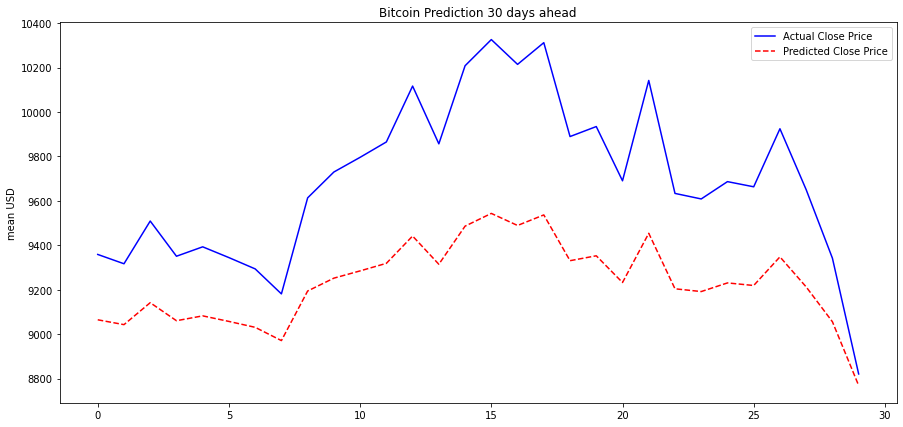

In [0]:
plt.figure(figsize=(15,7))
plt.plot(Actual_30_days_array,color='b', label='Actual Close Price')
plt.plot(svm_prediction,color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin Prediction 30 days ahead')
plt.ylabel('mean USD')
plt.show()

REFERENCE: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Support Vector Machine Parameters https://pythonprogramming.net/support-vector-machine-parameters-machine-learning-tutorial/

Fan, Rong-En, et al., “LIBLINEAR: A library for large linear classification.”, Journal of machine learning research 9.Aug (2008): 1871-1874.

Support vector regression (SVR) is a statistical method that examines the linear relationship between two continuous variables.



In the case of regression using a support vector machine, we do something similar but with a slight change. Here we define a small error value e (error = prediction - actual).
The value of e determines the width of the error tube (also called insensitive tube). The value of e determines the number of support vectors, and a smaller e value indicates a lower tolerance for error.
Thus, we try to find the line’s best fit in such a way that:
(mx+c)-y ≤ e and y-(mx+c) ≤ e

REFERENCE https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7


